Temperature Forecast Project using ML
Problem Statement:
Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature



Note: Use the link below to download the dataset. 

Downlaod Files:
https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNetCV


from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import zscore
from scipy import stats

In [2]:
#df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")

In [3]:
#df.to_csv("Temperature.csv")

In [4]:
df = pd.read_csv("Temperature.csv",index_col="Unnamed: 0")

In [5]:
pd.set_option('display.max_columns',None)
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [6]:
df.shape

(7752, 25)

(7752, 25) is the shape of the dataset

In [7]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

Next_Tmax and NextTmin are target columns so this is a regression problem

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


There is a lot of missing data in many features

In [9]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [10]:
df1=df.copy()

In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(7588, 25)

In [13]:
7588/7752

0.9788441692466461

By dropping all the rows with missing values we still retain 97.8 % of data so its ok in dropping the rows with missing values

In [14]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,0.355528,0.317546,0.298268,0.589008,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,0.257922,0.249833,0.253392,1.927577,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,0.140324,0.100950,0.081495,0.000000,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,0.311676,0.261795,0.227459,0.000000,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,0.557164,0.496444,0.498127,0.052594,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


In [15]:
df.describe().iloc[[3,7]]

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
min,1.0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.370,0.0985,4329.520508,17.4,11.3
max,25.0,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.97471,23.701544,21.621661,15.841235,16.655469,37.6450,127.135,212.335,5.1782,5992.895996,38.9,29.8



There are maximum and minimum value for many features used. so verifying whther the min and max are correct or any data is entered wrong

station - used weather station number: 1 to 25
Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
lat - Latitude (Â°): 37.456 to 37.645
lon - Longitude (Â°): 126.826 to 127.135
DEM - Elevation (m): 12.4 to 212.3
Slope - Slope (Â°): 0.1 to 5.2
Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Median of Tv is 149 , radio is 22.9 , Newspaper is 25 and sales is 12
mean of Tv is 147.042500, radio is 23.264000, newspaper is 30.554000 and sales is 14.022500

In [16]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


## EDA

Present_Tmax - Maximum air temperature

Present_Tmin - Minimum air temperature

LDAPS_RHmin - minimum relative humidity

LDAPS_RHmax - maximum relative humidity (%)

LDAPS_Tmax_lapse - maximum air temperature applied lapse rate (Â°C)

LDAPS_Tmin_lapse - minimum air temperature applied lapse rate (Â°C)

LDAPS_WS - next-day average wind speed (m/s): 

LDAPS_LH  - average latent heat flux (W/m2): 

LDAPS_CC1- next-day 1st 6-hour split average cloud cover (0-5 h) 

LDAPS_CC12- next-day 2nd 6-hour split average cloud cover (6-11 h)

LDAPS_CC3- next-day 3rd 6-hour split average cloud cover (12-17 h)

LDAPS_CC4- next-day 4th 6-hour split average cloud cover (18-23 h)

LDAPS_PPT1 - next-day 1st 6-hour split average precipitation (0-5 h)

LDAPS_PPT2 - next-day 2nd 6-hour split average precipitation (6-11 h)

LDAPS_PPT3 - next-day 3rd 6-hour split average precipitation (12-17 h)

LDAPS_PPT4- next-day 4th 6-hour split average precipitation (18-23 h)


In [17]:
features1=['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4']

Present_Tmax


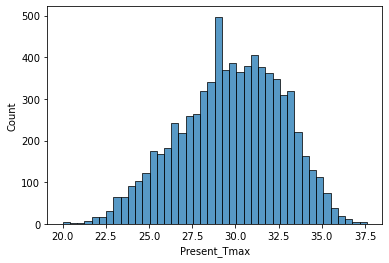

Present_Tmin


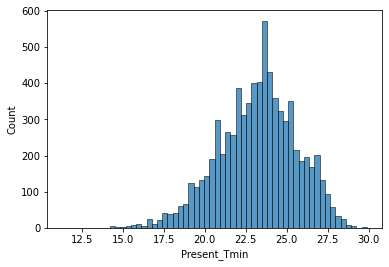

LDAPS_RHmin


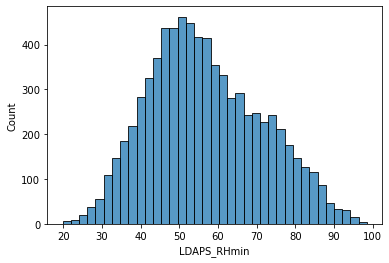

LDAPS_RHmax


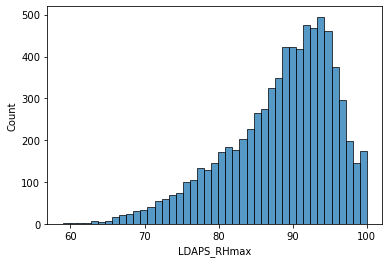

LDAPS_Tmax_lapse


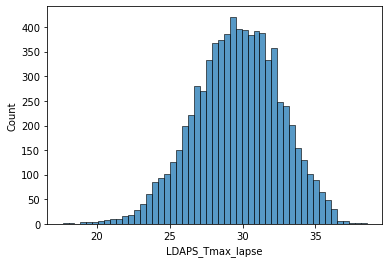

LDAPS_Tmin_lapse


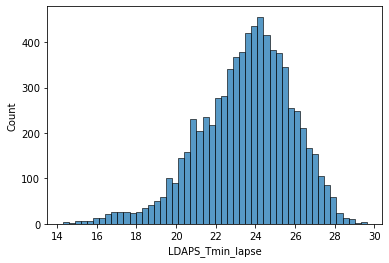

LDAPS_WS


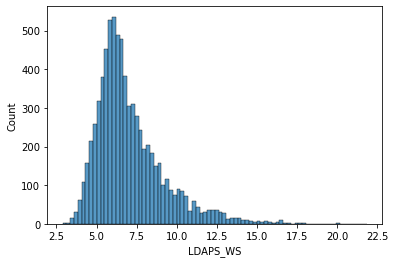

LDAPS_LH


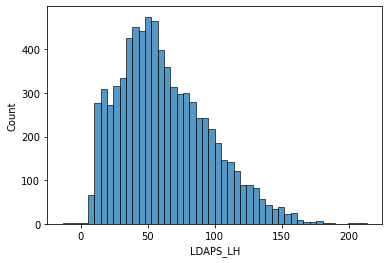

LDAPS_CC1


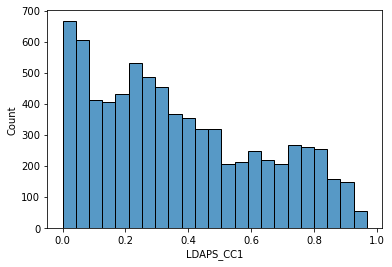

LDAPS_CC2


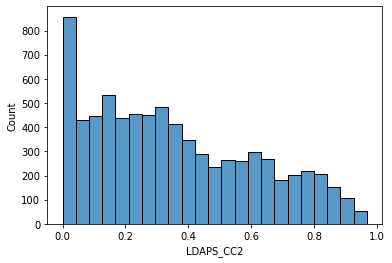

LDAPS_CC3


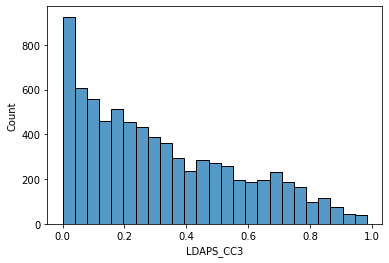

LDAPS_CC4


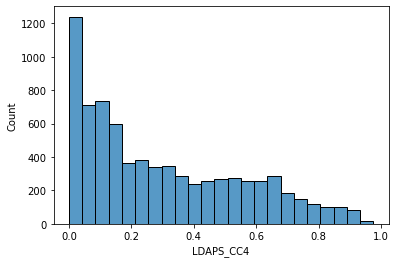

In [18]:
for col in features1:
    print(col)
    sns.histplot(df[col])
    plt.show()

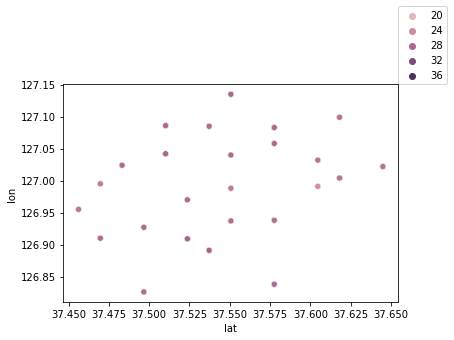

In [19]:
sns.scatterplot(x='lat',y='lon',data=df,hue='Next_Tmax')
plt.legend(loc=(1,1))

<AxesSubplot:xlabel='lat', ylabel='lon'>

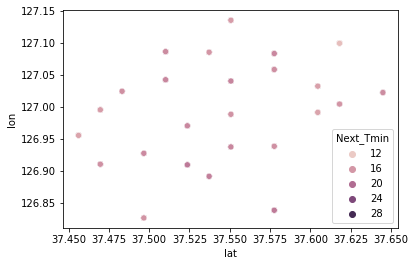

In [20]:
sns.scatterplot(x='lat',y='lon',data=df,hue='Next_Tmin')

<AxesSubplot:xlabel='Present_Tmax', ylabel='Next_Tmax'>

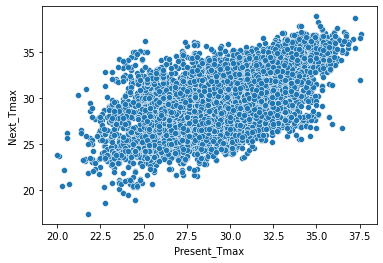

In [21]:
sns.scatterplot(x='Present_Tmax',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='Present_Tmin', ylabel='Next_Tmin'>

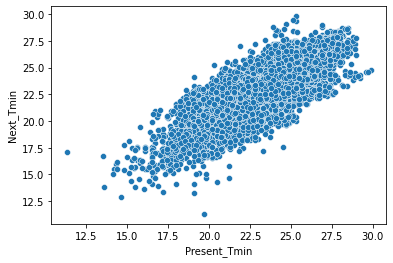

In [22]:
sns.scatterplot(x='Present_Tmin',y='Next_Tmin',data=df)

In [23]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   object 
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64


In [25]:
zScores=np.abs(zscore(df.drop('Date',axis=1)))

In [26]:
filteredEntries=(zScores<3).all(axis=1)
filteredEntries

array([ True,  True,  True, ...,  True,  True,  True])

In [27]:
np.sum(filteredEntries)

6739

In [28]:
df.shape

(7588, 25)

In [29]:
((7588-6739)/7588)*100

11.188719030047443

11% is a lot of data so not removing them

In [30]:
df=df[filteredEntries]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6739 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           6739 non-null   float64
 1   Date              6739 non-null   object 
 2   Present_Tmax      6739 non-null   float64
 3   Present_Tmin      6739 non-null   float64
 4   LDAPS_RHmin       6739 non-null   float64
 5   LDAPS_RHmax       6739 non-null   float64
 6   LDAPS_Tmax_lapse  6739 non-null   float64
 7   LDAPS_Tmin_lapse  6739 non-null   float64
 8   LDAPS_WS          6739 non-null   float64
 9   LDAPS_LH          6739 non-null   float64
 10  LDAPS_CC1         6739 non-null   float64
 11  LDAPS_CC2         6739 non-null   float64
 12  LDAPS_CC3         6739 non-null   float64
 13  LDAPS_CC4         6739 non-null   float64
 14  LDAPS_PPT1        6739 non-null   float64
 15  LDAPS_PPT2        6739 non-null   float64
 16  LDAPS_PPT3        6739 non-null   float64


From Date feature extracting day, month and yearb

In [32]:
df['Date'].head()

0    30-06-2013
1    30-06-2013
2    30-06-2013
3    30-06-2013
4    30-06-2013
Name: Date, dtype: object

In [33]:
df['Day']=df['Date'].apply(lambda x: str(x).split('-')[0])

In [34]:
df['Month']=df['Date'].apply(lambda x: str(x).split('-')[1])

In [35]:
df['Year']=df['Date'].apply(lambda x: str(x).split('-')[2])

In [36]:
df.drop('Date',axis=1,inplace=True)

<AxesSubplot:xlabel='Day', ylabel='Next_Tmax'>

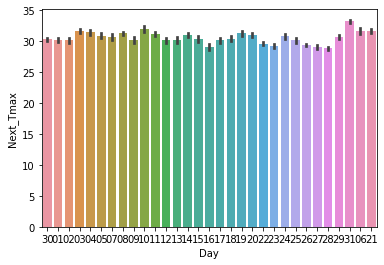

In [37]:
sns.barplot(x='Day',y='Next_Tmax',data=df)

The mean of max temperatures is almost between 30 and 34 for evy day

<AxesSubplot:xlabel='Day', ylabel='Next_Tmin'>

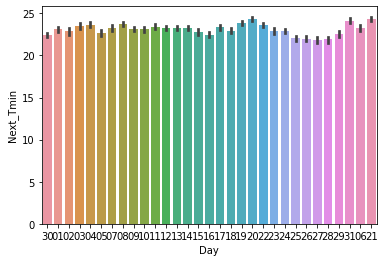

In [38]:
sns.barplot(x='Day',y='Next_Tmin',data=df)

The mean of minimum temperatures is between 22 and 25 every day

<AxesSubplot:xlabel='Month', ylabel='Next_Tmax'>

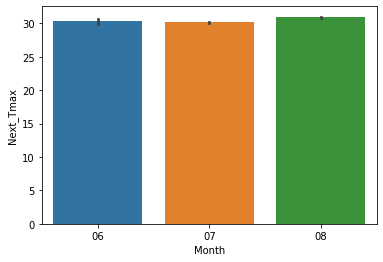

In [39]:
sns.barplot(x='Month',y='Next_Tmax',data=df)

The mean of max temperatures is about 30 every month

<AxesSubplot:xlabel='Month', ylabel='Next_Tmin'>

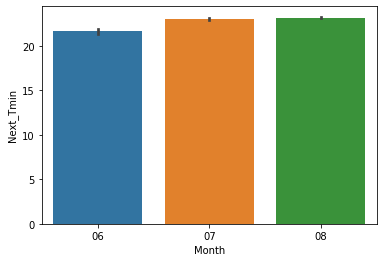

In [40]:
sns.barplot(x='Month',y='Next_Tmin',data=df)

The mean of min temperatures is about 21 to 23 every month

<AxesSubplot:xlabel='Year', ylabel='Next_Tmax'>

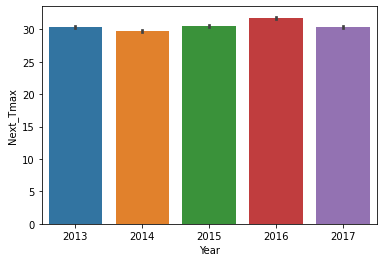

In [41]:
sns.barplot(x='Year',y='Next_Tmax',data=df)

The mean of max temperatures is about 30 every year

<AxesSubplot:xlabel='Year', ylabel='Next_Tmin'>

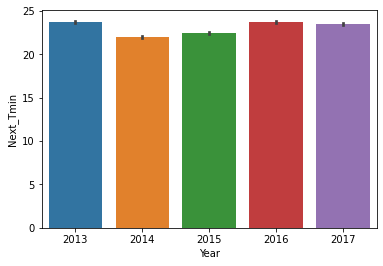

In [42]:
sns.barplot(x='Year',y='Next_Tmin',data=df)

The mean of min temperatures is about 23 to 25 every year

Divinding into X and Y

In [43]:
df1=df.copy()

In [44]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day', 'Month', 'Year'],
      dtype='object')

### Predicting 'Next_Tmax' First

In [45]:
y=df['Next_Tmax']
X=df.drop(['Next_Tmax','Next_Tmin'],axis=1)

## identifying the best random state

In [46]:
minRMSE="null"
minRS=0
for i in range(200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    pred=lr.predict(X_test)
    RMSE=np.sqrt(mean_squared_error(y_test,pred))
    if(minRMSE=="null" or RMSE<minRMSE):
        minRMSE=RMSE
        minRS=i
        
print("min RMSE is",minRMSE,"on random state",minRS)

min RMSE is 1.3693685929057822 on random state 25


min RMSE is 1.3693685929057822 on random state 25

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=25)


## Scaling

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()

In [51]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day', 'Month', 'Year'],
      dtype='object')

In [56]:
x_train_scale=scaler.fit_transform(X_train)

In [58]:
XtrainDF=pd.DataFrame(x_train_scale,columns=X_train.columns)
XtrainDF.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Day,Month,Year
0,-0.840454,0.767053,0.871712,0.440310,0.369463,0.310829,0.560593,-1.117930,1.326994,-0.755827,-0.604652,0.853357,1.601184,-0.346483,-0.280257,-0.259429,-0.240459,0.668731,-1.929444,-0.908096,-0.846837,0.204085,1.593695,-0.909167,1.434107
1,1.506439,1.395603,0.656175,-0.969831,0.150129,0.227135,-0.178899,0.478057,-0.177954,-0.988589,-1.157455,-1.276622,-0.450628,-0.346483,-0.280257,-0.259429,-0.240459,-0.405322,-1.029404,-0.816000,-0.755032,1.013343,-0.651541,-0.909167,-0.710878
2,0.125914,1.151167,1.345891,-1.354140,-0.892991,2.002623,1.110677,-0.022577,-1.074233,0.220101,-0.453966,-0.135688,-0.218728,-0.213754,-0.280257,-0.259429,-0.240459,-0.943344,-0.801225,-0.560361,-0.461600,0.166178,1.705957,-0.909167,-0.710878
3,1.644492,0.208341,-0.507720,0.068381,0.031173,-0.965983,0.323968,0.301232,-0.128890,0.470237,0.458634,0.973140,1.695442,-0.346483,-0.280257,2.320536,1.015850,-0.405322,-0.256130,-0.773205,-0.718696,-1.575367,0.920124,1.003643,-0.710878
4,1.506439,0.382939,0.569961,1.733360,0.946882,-0.743410,0.054086,2.280412,0.008583,1.672117,1.767208,2.359973,1.998886,2.013832,-0.073542,-0.181996,0.579002,-0.405322,-1.029404,-0.816000,-0.755032,1.038827,-0.763803,-0.909167,1.434107


In [59]:
XtrainDF.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Day,Month,Year
count,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03,4515.000000,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03
mean,1.085879e-16,-1.008766e-15,-2.647814e-16,4.233355e-16,-4.721214e-18,-6.810351e-16,6.216265e-16,1.416364e-16,0.000000,7.317882e-17,6.334296e-17,-1.770455e-17,-6.176922e-17,2.360607e-17,-2.950759e-17,7.868690e-19,-1.731112e-17,-1.795635e-14,2.515007e-13,-2.832729e-17,-5.822831e-17,1.967173e-15,5.508083e-17,-1.857011e-16,-3.343879e-14
std,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00
min,-1.668769e+00,-3.039169e+00,-3.094155e+00,-2.577987e+00,-3.041198e+00,-3.102249e+00,-3.153273e+00,-1.918125e+00,-2.112624,-1.383537e+00,-1.385296e+00,-1.282853e+00,-1.173790e+00,-3.464827e-01,-2.802574e-01,-2.594289e-01,-2.404587e-01,-1.750379e+00,-2.081564e+00,-9.080959e-01,-8.468367e-01,-2.312502e+00,-1.661898e+00,-2.821978e+00,-1.425873e+00
25%,-8.404541e-01,-6.297259e-01,-6.801492e-01,-7.197489e-01,-6.042240e-01,-6.991254e-01,-6.490484e-01,-6.753921e-01,-0.749797,-8.413428e-01,-8.237341e-01,-8.546840e-01,-8.535154e-01,-3.464827e-01,-2.802574e-01,-2.594289e-01,-2.404587e-01,-6.743330e-01,-6.744583e-01,-6.027670e-01,-7.186962e-01,-7.713529e-01,-8.760648e-01,-9.091675e-01,-7.108777e-01
50%,-1.213884e-02,3.374388e-02,5.267390e-02,-1.068638e-01,1.744829e-01,1.598124e-02,1.026744e-01,-2.266178e-01,-0.163669,-1.929650e-01,-1.469165e-01,-2.096751e-01,-2.819876e-01,-3.464827e-01,-2.802574e-01,-2.594289e-01,-2.404587e-01,1.327013e-01,6.078604e-02,-2.846117e-01,-4.615996e-01,2.160978e-01,2.202967e-02,-9.091675e-01,4.117358e-03
75%,8.161765e-01,7.670526e-01,6.992826e-01,6.968239e-01,7.706311e-01,7.125817e-01,6.955147e-01,4.782136e-01,0.669281,6.449122e-01,7.587498e-01,7.033820e-01,7.808418e-01,-3.230856e-01,-2.739079e-01,-2.551653e-01,-2.404587e-01,6.687314e-01,6.565875e-01,-2.067137e-02,3.910386e-01,8.928157e-01,9.201242e-01,1.003643e+00,7.191124e-01
max,1.644492e+00,2.687623e+00,2.768430e+00,2.888205e+00,1.698748e+00,2.992802e+00,2.673336e+00,3.635633e+00,3.031060,2.435739e+00,2.639214e+00,2.940838e+00,2.891213e+00,6.431544e+00,7.359552e+00,8.810050e+00,1.007290e+01,2.011796e+00,1.835514e+00,2.830734e+00,2.920033e+00,1.543873e+00,1.705957e+00,1.003643e+00,1.434107e+00


In [62]:
x_test_scale=scaler.transform(X_test)

In [63]:
XtestDF=pd.DataFrame(x_test_scale,columns=X_train.columns)
XtestDF.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Day,Month,Year
0,1.092282,-0.455129,-1.068114,-1.660028,-1.311395,0.598702,-1.201813,-0.616148,-1.268875,-1.141927,-1.151514,-0.523105,0.292761,-0.346483,-0.280257,-0.259429,-0.091534,0.132701,0.631234,-0.647678,-0.495637,1.148739,-1.212850,-0.909167,0.004117
1,-0.426296,-1.328115,-0.162862,-0.364650,1.072516,-1.376968,-0.565975,0.635758,-0.111047,-0.559524,-0.888003,-1.004244,-0.350092,-0.346483,-0.280257,-0.259429,-0.240459,-1.750379,-0.446279,2.759160,2.920033,-2.213035,1.481433,1.003643,-1.425873
2,0.678124,0.068663,0.311317,-1.249746,0.026764,0.392475,-0.993389,-1.053557,0.955372,-0.499548,-1.260962,-1.267363,-0.710249,-0.346483,-0.280257,-0.259429,-0.240459,-1.212356,0.428408,-0.084011,-0.006805,-1.429326,0.695601,1.003643,0.004117
3,0.540071,0.732133,-0.766364,-0.351330,0.933117,0.711850,-0.158454,-1.311091,1.133474,-0.225363,-0.877526,0.995580,1.671821,-0.346483,-0.280257,-0.259429,0.556436,1.475766,1.379155,-0.139609,-0.403017,1.039049,-0.651541,-0.909167,0.719112
4,-0.150191,-1.188437,-0.292184,0.377576,-1.360036,-1.381724,-0.643654,2.414938,-1.061545,1.026691,0.642504,1.467125,1.816143,-0.231636,-0.273566,-0.259429,-0.230367,0.132701,-0.027950,1.330883,-0.480064,-0.539617,-0.314756,1.003643,1.434107


In [64]:
lr=LinearRegression()
lr.fit(XtrainDF,y_train)
pred=lr.predict(XtestDF)

lrR2=r2_score(y_test, pred)
lrR2

0.7775545251615913

In [65]:
lrRMSE=np.sqrt(mean_squared_error(y_test,pred))
lrRMSE

1.3693685929057815

In [66]:
svr=SVR()
svr.fit(XtrainDF,y_train)
pred=svr.predict(XtestDF)
svrR2=r2_score(y_test, pred)
svrR2

0.8687527777083489

In [67]:
svrRMSE=np.sqrt(mean_squared_error(y_test,pred))
svrRMSE

1.051849574480975

In [68]:
sgd=SGDRegressor()
sgd.fit(XtrainDF,y_train)
pred=sgd.predict(XtestDF)
sgdR2=r2_score(y_test, pred)
sgdR2

0.7753325125677653

In [69]:
sgdRMSE=np.sqrt(mean_squared_error(y_test,pred))
sgdRMSE

1.376190924181797

In [70]:
knnR=KNeighborsRegressor()
knnR.fit(XtrainDF,y_train)
pred=knnR.predict(XtestDF)
knnR2=r2_score(y_test, pred)
knnR2

0.8550260482576495

In [71]:
knnrRMSE=np.sqrt(mean_squared_error(y_test,pred))
knnrRMSE

1.105486806405527

## frinding cross val score for each model

In [72]:
from sklearn.pipeline import Pipeline


In [73]:

operations = [('scaler',StandardScaler()),('lr',lr)]
pipe=Pipeline(operations)
lrCV=cross_val_score(pipe,X,y,cv=5,scoring='r2').mean()
lrCV

0.6476002847401803

In [74]:

operations = [('scaler',StandardScaler()),('svr',svr)]
pipe=Pipeline(operations)

svrCV=cross_val_score(pipe,X,y,cv=5,scoring='r2').mean()
svrCV

0.6394710471044791

In [75]:
operations = [('scaler',StandardScaler()),('sgd',sgd)]
pipe=Pipeline(operations)

sgdCV=cross_val_score(pipe,X,y,cv=5,scoring='r2').mean()
sgdCV

0.6476989142911165

In [76]:
operations = [('scaler',StandardScaler()),('knnr',knnR)]
pipe=Pipeline(operations)

knnrCV=cross_val_score(pipe,X,y,cv=5,scoring='r2').mean()
knnrCV

0.44701531809249245

In [77]:
def rmseValue(model,indepen,depend):
    y_pred=model.predict(indepen)
    return np.sqrt(mean_squared_error(y_pred,depend))

operations = [('scaler',StandardScaler()),('lr',lr)]
pipe=Pipeline(operations)
lrCV1=cross_val_score(pipe,X,y,cv=5,scoring=rmseValue).mean()

operations = [('scaler',StandardScaler()),('svr',svr)]
pipe=Pipeline(operations)
svrCV1=cross_val_score(pipe,X,y,cv=5,scoring=rmseValue).mean()

operations = [('scaler',StandardScaler()),('SGD',sgd)]
pipe=Pipeline(operations)
sgdCV1=cross_val_score(pipe,X,y,cv=5,scoring=rmseValue).mean()

operations = [('scaler',StandardScaler()),('knnr',knnR)]
pipe=Pipeline(operations)
knnrCV1=cross_val_score(pipe,X,y,cv=5,scoring=rmseValue).mean()


### Comparing r2 scores for normal model and cross val score

In [78]:
print(lrR2-lrCV)
print(svrR2-svrCV)
print(sgdR2-sgdCV)
print(knnR2-knnrCV)

0.12995424042141102
0.2292817306038698
0.12763359827664877
0.40801073016515704


Stochastic Gradient Descent is the best method, as the difference between r2Score for cross val score and normal model r2Score is less (0.12763359827664877)

In [79]:
print(lrRMSE-lrCV1)
print(svrRMSE-svrCV1)
print(sgdRMSE-sgdCV1)
print(knnrRMSE-knnrCV1)

-0.3017482060883121
-0.6389850752966595
-0.27527778427776495
-0.9860260676016657


Even the difference between Rmse is less for Stochastic Gradient Descent

## Hyper Parameter Tuning using a pipeline for KNNR

In [80]:
help(sgd)

Help on SGDRegressor in module sklearn.linear_model._stochastic_gradient object:

class SGDRegressor(BaseSGDRegressor)
 |  SGDRegressor(loss='squared_loss', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling', eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False)
 |  
 |  Linear model fitted by minimizing a regularized empirical loss with SGD
 |  
 |  SGD stands for Stochastic Gradient Descent: the gradient of the loss is
 |  estimated each sample at a time and the model is updated along the way with
 |  a decreasing strength schedule (aka learning rate).
 |  
 |  The regularizer is a penalty added to the loss function that shrinks model
 |  parameters towards the zero vector using either the squared euclidean norm
 |  L2 or the absolute norm L1 or a combination of both (Elastic Net). If the
 |

In [82]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline



In [84]:
operations = [('scaler',StandardScaler()),('sgdR',SGDRegressor())]

In [85]:
pipe = Pipeline(operations)

In [99]:
param_grid = {'sgdR__penalty':['elasticnet'],
             'sgdR__l1_ratio':[0,0.15,0.5,0.75,1],
              'sgdR__alpha':[0.0001,0.01,0.5,1],
              'sgdR__early_stopping':[True]}

In [100]:
grid = GridSearchCV(pipe,param_grid,cv=5,scoring='neg_mean_squared_error',verbose=2)

In [101]:
grid.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END sgdR__alpha=0.0001, sgdR__early_stopping=True, sgdR__l1_ratio=0, sgdR__penalty=elasticnet; total time=   0.0s
[CV] END sgdR__alpha=0.0001, sgdR__early_stopping=True, sgdR__l1_ratio=0, sgdR__penalty=elasticnet; total time=   0.0s
[CV] END sgdR__alpha=0.0001, sgdR__early_stopping=True, sgdR__l1_ratio=0, sgdR__penalty=elasticnet; total time=   0.0s
[CV] END sgdR__alpha=0.0001, sgdR__early_stopping=True, sgdR__l1_ratio=0, sgdR__penalty=elasticnet; total time=   0.0s
[CV] END sgdR__alpha=0.0001, sgdR__early_stopping=True, sgdR__l1_ratio=0, sgdR__penalty=elasticnet; total time=   0.0s
[CV] END sgdR__alpha=0.0001, sgdR__early_stopping=True, sgdR__l1_ratio=0.15, sgdR__penalty=elasticnet; total time=   0.0s
[CV] END sgdR__alpha=0.0001, sgdR__early_stopping=True, sgdR__l1_ratio=0.15, sgdR__penalty=elasticnet; total time=   0.0s
[CV] END sgdR__alpha=0.0001, sgdR__early_stopping=True, sgdR__l1_ratio=0.15, sgdR__penalty=elasticn

[CV] END sgdR__alpha=0.5, sgdR__early_stopping=True, sgdR__l1_ratio=0.75, sgdR__penalty=elasticnet; total time=   0.0s
[CV] END sgdR__alpha=0.5, sgdR__early_stopping=True, sgdR__l1_ratio=1, sgdR__penalty=elasticnet; total time=   0.0s
[CV] END sgdR__alpha=0.5, sgdR__early_stopping=True, sgdR__l1_ratio=1, sgdR__penalty=elasticnet; total time=   0.0s
[CV] END sgdR__alpha=0.5, sgdR__early_stopping=True, sgdR__l1_ratio=1, sgdR__penalty=elasticnet; total time=   0.0s
[CV] END sgdR__alpha=0.5, sgdR__early_stopping=True, sgdR__l1_ratio=1, sgdR__penalty=elasticnet; total time=   0.0s
[CV] END sgdR__alpha=0.5, sgdR__early_stopping=True, sgdR__l1_ratio=1, sgdR__penalty=elasticnet; total time=   0.0s
[CV] END sgdR__alpha=1, sgdR__early_stopping=True, sgdR__l1_ratio=0, sgdR__penalty=elasticnet; total time=   0.0s
[CV] END sgdR__alpha=1, sgdR__early_stopping=True, sgdR__l1_ratio=0, sgdR__penalty=elasticnet; total time=   0.0s
[CV] END sgdR__alpha=1, sgdR__early_stopping=True, sgdR__l1_ratio=0, sgdR

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('sgdR', SGDRegressor())]),
             param_grid={'sgdR__alpha': [0.0001, 0.01, 0.5, 1],
                         'sgdR__early_stopping': [True],
                         'sgdR__l1_ratio': [0, 0.15, 0.5, 0.75, 1],
                         'sgdR__penalty': ['elasticnet']},
             scoring='neg_mean_squared_error', verbose=2)

In [102]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('sgdR',
                 SGDRegressor(alpha=0.5, early_stopping=True, l1_ratio=0,
                              penalty='elasticnet'))])

In [103]:
grid.best_params_

{'sgdR__alpha': 0.5,
 'sgdR__early_stopping': True,
 'sgdR__l1_ratio': 0,
 'sgdR__penalty': 'elasticnet'}

In [104]:
grid.best_score_

-2.651023272815846

In [105]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_sgdR__alpha', 'param_sgdR__early_stopping', 'param_sgdR__l1_ratio', 'param_sgdR__penalty', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [106]:
pd.DataFrame(data=grid.cv_results_,columns=grid.cv_results_.keys())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_sgdR__alpha,param_sgdR__early_stopping,param_sgdR__l1_ratio,param_sgdR__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.047616,0.009098,0.004321,0.005806,0.0001,True,0,elasticnet,"{'sgdR__alpha': 0.0001, 'sgdR__early_stopping'...",-1.938711,-2.525993,-2.169773,-2.981899,-4.097029,-2.742681,0.763286,9
1,0.038878,0.009502,0.007044,0.007151,0.0001,True,0.15,elasticnet,"{'sgdR__alpha': 0.0001, 'sgdR__early_stopping'...",-2.034250,-2.405451,-2.150080,-2.897713,-4.089955,-2.715490,0.748633,3
2,0.060179,0.018881,0.003397,0.002939,0.0001,True,0.5,elasticnet,"{'sgdR__alpha': 0.0001, 'sgdR__early_stopping'...",-2.032068,-2.397860,-2.196214,-2.886986,-4.165899,-2.735805,0.770537,7
3,0.052691,0.013063,0.007069,0.004395,0.0001,True,0.75,elasticnet,"{'sgdR__alpha': 0.0001, 'sgdR__early_stopping'...",-1.929648,-2.643805,-2.194837,-2.730396,-4.099918,-2.719721,0.749738,4
4,0.038057,0.014382,0.008045,0.006406,0.0001,True,1,elasticnet,"{'sgdR__alpha': 0.0001, 'sgdR__early_stopping'...",-2.043041,-2.429833,-2.197721,-2.823541,-4.122800,-2.723387,0.747497,5
5,0.039758,0.013900,0.003923,0.006052,0.01,True,0,elasticnet,"{'sgdR__alpha': 0.01, 'sgdR__early_stopping': ...",-1.922051,-2.496944,-2.171325,-3.029309,-4.409614,-2.805849,0.883305,12
6,0.049603,0.013311,0.001595,0.003191,0.01,True,0.15,elasticnet,"{'sgdR__alpha': 0.01, 'sgdR__early_stopping': ...",-1.906344,-2.527753,-2.240777,-2.899300,-4.154109,-2.745656,0.776425,10
7,0.041756,0.006475,0.005118,0.005739,0.01,True,0.5,elasticnet,"{'sgdR__alpha': 0.01, 'sgdR__early_stopping': ...",-2.124544,-2.573500,-2.200036,-2.864985,-3.926209,-2.737855,0.651270,8
8,0.064428,0.006232,0.004587,0.000799,0.01,True,0.75,elasticnet,"{'sgdR__alpha': 0.01, 'sgdR__early_stopping': ...",-1.810121,-2.502093,-2.201473,-2.950475,-3.960793,-2.684991,0.739025,2
9,0.052087,0.006517,0.004388,0.002863,0.01,True,1,elasticnet,"{'sgdR__alpha': 0.01, 'sgdR__early_stopping': ...",-2.008299,-2.511009,-2.211534,-2.895825,-4.019056,-2.729145,0.710884,6


In [107]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('sgdR',
                 SGDRegressor(alpha=0.5, early_stopping=True, l1_ratio=0,
                              penalty='elasticnet'))])

In [108]:
grid.best_params_

{'sgdR__alpha': 0.5,
 'sgdR__early_stopping': True,
 'sgdR__l1_ratio': 0,
 'sgdR__penalty': 'elasticnet'}

The best estimator is 
{'sgdR__alpha': 0.5,
 'sgdR__early_stopping': True,
 'sgdR__l1_ratio': 0,
 'sgdR__penalty': 'elasticnet'}

## Training with best parameters

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=25)

In [110]:
X_scale_train=scaler.fit_transform(X_train)

In [111]:
X_scale_test=scaler.transform(X_test)

In [112]:
Final_model=SGDRegressor(alpha=.5,l1_ratio=0,penalty='elasticnet')
Final_model.fit(X_scale_train,y_train)
pred=Final_model.predict(X_scale_test)

In [113]:
finalRMSE=np.sqrt(mean_squared_error(y_test,pred))
finalRMSE

1.4604106440645046

final Root mean square error of the model is only 1.4604106440645046 which is very less

In [116]:
df['Next_Tmax'].mean()

30.532556759163086

### Predicting Next_Tmin

In [118]:
y1=df['Next_Tmin']
X1=df.drop(['Next_Tmax','Next_Tmin'],axis=1)

In [119]:
minRMSE="null"
minRS=0
for i in range(200):
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    pred=lr.predict(X_test)
    RMSE=np.sqrt(mean_squared_error(y_test,pred))
    if(minRMSE=="null" or RMSE<minRMSE):
        minRMSE=RMSE
        minRS=i
        
print("min RMSE is",minRMSE,"on random state",minRS)

min RMSE is 0.9552378222706064 on random state 83


min RMSE is 0.9552378222706064 on random state 83

In [121]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.33, random_state=83)

In [122]:
from sklearn.preprocessing import StandardScaler

In [123]:
scaler = StandardScaler()

In [124]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day', 'Month', 'Year'],
      dtype='object')

In [125]:
x_train_scale1=scaler.fit_transform(X_train1)

In [126]:
XtrainDF1=pd.DataFrame(x_train_scale1,columns=X_train1.columns)
XtrainDF1.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Day,Month,Year
0,-1.667622,-0.815159,-0.254083,2.099294,1.408171,-1.018795,0.129254,1.902813,-0.462409,1.256621,2.081997,1.351917,-0.371415,-0.291830,2.285662,-0.245566,-0.237542,1.195584,-0.002435,2.858785,1.140532,0.301607,-1.326204,0.991162,0.009012
1,1.379001,0.057075,-0.254083,0.697985,0.727890,-1.301489,-1.056176,-1.256564,-0.323521,0.457795,1.972926,1.888816,1.530679,-0.333951,5.080237,1.239233,-0.223447,-0.152069,-1.254647,-0.847254,-0.800511,-0.920644,0.019170,0.991162,-0.704835
2,0.963553,-0.291819,0.220710,0.691461,1.548585,-1.450469,-0.699522,0.571228,0.765864,0.397108,0.824173,-0.704881,-1.172660,-0.333013,0.416660,-0.229855,-0.237542,1.465515,0.160352,1.619699,2.575942,0.643866,1.140315,-0.914757,0.009012
3,0.963553,0.719973,-1.160506,-0.217464,-0.654169,0.267341,-0.424042,-0.009115,2.051740,-1.350089,-1.364247,-1.175524,0.026656,-0.340709,-0.281076,-0.256627,-0.237542,1.465515,0.160352,1.619699,2.575942,1.250855,-0.877746,-0.914757,0.722859
4,0.271138,-0.570934,0.695503,-1.306727,0.427634,0.259149,-0.485542,-0.350996,-1.250754,-0.686846,-0.938486,-1.218067,-1.037337,-0.340709,-0.281076,-0.256627,-0.237542,0.117861,-0.678629,-0.574901,-0.283953,-1.529043,0.916086,0.991162,1.436706


In [127]:
XtrainDF1.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Day,Month,Year
count,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03,4.515000e+03
mean,1.046536e-16,-2.405459e-15,-4.343517e-16,-1.479314e-16,-3.037314e-16,1.156697e-16,-6.035285e-16,1.251122e-16,2.014385e-16,-1.904223e-16,1.542263e-16,-4.721214e-17,-8.970307e-17,4.878588e-17,2.360607e-18,9.442428e-18,8.655559e-18,-3.102152e-14,-8.036687e-14,4.721214e-17,4.878588e-17,-4.091719e-16,-1.101617e-17,4.233355e-16,-6.691692e-14
std,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00
min,-1.667622e+00,-3.048079e+00,-3.102842e+00,-2.590501e+00,-3.086832e+00,-3.126008e+00,-3.145479e+00,-2.149415e+00,-2.111969e+00,-1.383937e+00,-1.383162e+00,-1.277539e+00,-1.174914e+00,-3.407088e-01,-2.810756e-01,-2.566274e-01,-2.375419e-01,-1.771653e+00,-2.068584e+00,-9.078629e-01,-8.425120e-01,-2.312052e+00,-1.662548e+00,-2.820676e+00,-1.418682e+00
25%,-8.367250e-01,-6.756019e-01,-6.857134e-01,-7.207588e-01,-5.955438e-01,-6.839640e-01,-6.516585e-01,-6.783055e-01,-7.679725e-01,-8.296778e-01,-8.259511e-01,-8.547052e-01,-8.436703e-01,-3.407088e-01,-2.810756e-01,-2.566274e-01,-2.375419e-01,-6.919307e-01,-6.786293e-01,-6.002623e-01,-7.149594e-01,-7.661948e-01,-8.777463e-01,-9.147568e-01,-7.048350e-01
50%,-5.827630e-03,5.707484e-02,9.122069e-02,-9.949470e-02,1.633346e-01,1.990098e-02,1.028076e-01,-2.335684e-01,-1.668244e-01,-1.927818e-01,-1.519610e-01,-2.125526e-01,-2.920522e-01,-3.407088e-01,-2.810756e-01,-2.566274e-01,-2.375419e-01,1.178612e-01,4.765338e-02,-2.797399e-01,-4.590423e-01,2.100979e-01,1.916997e-02,-9.147568e-01,9.012022e-03
75%,8.250697e-01,7.548622e-01,6.955028e-01,6.944293e-01,7.702443e-01,7.105958e-01,6.995332e-01,4.787980e-01,6.748590e-01,6.295075e-01,7.534058e-01,7.111661e-01,7.603088e-01,-3.173104e-01,-2.747457e-01,-2.516103e-01,-2.375419e-01,6.557230e-01,6.361928e-01,-1.383581e-02,3.896845e-01,8.931951e-01,9.160863e-01,9.911624e-01,7.228590e-01
max,1.655967e+00,2.638888e+00,2.853653e+00,2.837512e+00,1.711998e+00,2.979092e+00,2.665642e+00,3.624553e+00,2.977219e+00,2.454696e+00,2.649820e+00,2.921957e+00,2.772198e+00,6.778483e+00,7.426674e+00,9.280740e+00,9.731766e+00,2.003377e+00,1.800750e+00,2.858785e+00,2.907077e+00,1.556105e+00,1.700888e+00,9.911624e-01,1.436706e+00


In [128]:
x_test_scale1=scaler.transform(X_test1)

In [129]:
XtestDF1=pd.DataFrame(x_test_scale1,columns=X_train1.columns)
XtestDF1.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Day,Month,Year
0,-1.113691,0.789752,0.566014,-0.257422,-0.369899,1.308727,0.663527,-0.529462,2.838637,-1.301225,-1.303140,-0.934057,-0.579162,-0.340709,-0.281076,-0.256627,-0.237542,0.117861,1.800750,-0.480876,-0.542084,0.750798,0.355514,-0.914757,1.436706
1,1.379001,1.173535,1.774578,-0.340492,-0.509230,0.284334,1.123882,-0.330440,0.775637,-1.163169,-1.117260,-0.632355,1.769290,-0.340709,-0.281076,-0.256627,-0.237542,-0.152069,-1.254647,-0.847254,-0.800511,-1.678663,0.916086,0.991162,0.722859
2,-0.421276,0.789752,-0.944691,-0.704086,-0.772046,0.998098,-0.028776,0.013862,0.172896,-0.719405,-0.529346,-0.762171,-0.617609,-0.340709,-0.281076,-0.256627,-0.237542,-1.771653,-0.453231,2.786678,2.907077,-1.363197,0.467628,0.991162,-1.418682
3,1.655967,0.964198,-0.167757,-1.653078,-2.725761,1.283177,0.236990,-0.613146,-1.168883,-0.882951,-1.285458,-0.953574,-1.074316,-0.340709,-0.281076,-0.256627,-0.237542,-0.422000,-0.265400,-0.771969,-0.714959,-1.572666,0.916086,0.991162,-1.418682
4,-0.282793,-1.129164,0.263873,-0.109930,1.147336,0.561351,0.560332,0.900716,-0.127157,0.759694,-0.391427,-0.765179,-0.874536,3.209668,-0.281076,-0.256627,-0.237542,-0.152069,1.174644,-0.600262,-0.455130,0.364394,1.364544,-0.914757,-1.418682


In [130]:
lr=LinearRegression()
lr.fit(XtrainDF1,y_train1)
pred=lr.predict(XtestDF1)

lrR2=r2_score(y_test1, pred)
lrR2

0.837489085971541

In [131]:
lrRMSE=np.sqrt(mean_squared_error(y_test1,pred))
lrRMSE

0.9552378222706053

In [132]:
svr=SVR()
svr.fit(XtrainDF1,y_train1)
pred=svr.predict(XtestDF1)
svrR2=r2_score(y_test1, pred)
svrR2

0.9064438878303186

In [133]:
svrRMSE=np.sqrt(mean_squared_error(y_test1,pred))
svrRMSE

0.7247802097110236

In [134]:
sgd=SGDRegressor()
sgd.fit(XtrainDF1,y_train1)
pred=sgd.predict(XtestDF1)
sgdR2=r2_score(y_test1, pred)
sgdR2

0.8365274764407759

In [135]:
sgdRMSE=np.sqrt(mean_squared_error(y_test1,pred))
sgdRMSE

0.9580598203211907

In [136]:
knnR=KNeighborsRegressor()
knnR.fit(XtrainDF1,y_train1)
pred=knnR.predict(XtestDF1)
knnR2=r2_score(y_test1, pred)
knnR2

0.866888001087825

In [137]:
knnrRMSE=np.sqrt(mean_squared_error(y_test1,pred))
knnrRMSE

0.8645275667490683

In [138]:
from sklearn.pipeline import Pipeline

In [140]:
operations = [('scaler',StandardScaler()),('lr',lr)]
pipe=Pipeline(operations)
lrCV=cross_val_score(pipe,X1,y1,cv=5,scoring='r2').mean()
lrCV

0.7739586129615997

In [141]:
operations = [('scaler',StandardScaler()),('svr',svr)]
pipe=Pipeline(operations)

svrCV=cross_val_score(pipe,X1,y1,cv=5,scoring='r2').mean()
svrCV

0.7189111537319188

In [142]:
operations = [('scaler',StandardScaler()),('sgd',sgd)]
pipe=Pipeline(operations)

sgdCV=cross_val_score(pipe,X1,y1,cv=5,scoring='r2').mean()
sgdCV

0.7728358223106875

In [143]:
operations = [('scaler',StandardScaler()),('knnr',knnR)]
pipe=Pipeline(operations)

knnrCV=cross_val_score(pipe,X1,y1,cv=5,scoring='r2').mean()
knnrCV

0.5418674061028926

In [144]:
def rmseValue(model,indepen,depend):
    y_pred=model.predict(indepen)
    return np.sqrt(mean_squared_error(y_pred,depend))

operations = [('scaler',StandardScaler()),('lr',lr)]
pipe=Pipeline(operations)
lrCV1=cross_val_score(pipe,X1,y1,cv=5,scoring=rmseValue).mean()

operations = [('scaler',StandardScaler()),('svr',svr)]
pipe=Pipeline(operations)
svrCV1=cross_val_score(pipe,X1,y1,cv=5,scoring=rmseValue).mean()

operations = [('scaler',StandardScaler()),('SGD',sgd)]
pipe=Pipeline(operations)
sgdCV1=cross_val_score(pipe,X1,y1,cv=5,scoring=rmseValue).mean()

operations = [('scaler',StandardScaler()),('knnr',knnR)]
pipe=Pipeline(operations)
knnrCV1=cross_val_score(pipe,X1,y1,cv=5,scoring=rmseValue).mean()


In [145]:
print(lrR2-lrCV)
print(svrR2-svrCV)
print(sgdR2-sgdCV)
print(knnR2-knnrCV)

0.0635304730099413
0.18753273409839977
0.06369165413008837
0.3250205949849324


In [148]:
print(lrR2)
print(svrR2)
print(sgdR2)
print(knnR2)

0.837489085971541
0.9064438878303186
0.8365274764407759
0.866888001087825


In [147]:
print(lrRMSE)
print(svrRMSE)
print(sgdRMSE)
print(knnrRMSE)

0.9552378222706053
0.7247802097110236
0.9580598203211907
0.8645275667490683


In [146]:
print(lrRMSE-lrCV1)
print(svrRMSE-svrCV1)
print(sgdRMSE-sgdCV1)
print(knnrRMSE-knnrCV1)

-0.08030217707608434
-0.4313781268489676
-0.07961428439962104
-0.6054668933050852


Stochastic Gradient Descent is the best method, as the difference between r2Score for cross val score and normal model r2Score is less (0.06369165413008837)

Even the difference between Rmse is less for Stochastic Gradient Descent

In [150]:
operations = [('scaler',StandardScaler()),('sgdR',SGDRegressor())]

In [151]:
param_grid = {'sgdR__penalty':['elasticnet'],
             'sgdR__l1_ratio':[0,0.15,0.5,0.75,1],
              'sgdR__alpha':[0.0001,0.01,0.5,1],
              'sgdR__early_stopping':[True]}

In [152]:
pipe = Pipeline(operations)

In [153]:
grid = GridSearchCV(pipe,param_grid,cv=5,scoring='neg_mean_squared_error',verbose=2)

In [154]:
grid.fit(X1,y1)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END sgdR__alpha=0.0001, sgdR__early_stopping=True, sgdR__l1_ratio=0, sgdR__penalty=elasticnet; total time=   0.0s
[CV] END sgdR__alpha=0.0001, sgdR__early_stopping=True, sgdR__l1_ratio=0, sgdR__penalty=elasticnet; total time=   0.0s
[CV] END sgdR__alpha=0.0001, sgdR__early_stopping=True, sgdR__l1_ratio=0, sgdR__penalty=elasticnet; total time=   0.0s
[CV] END sgdR__alpha=0.0001, sgdR__early_stopping=True, sgdR__l1_ratio=0, sgdR__penalty=elasticnet; total time=   0.0s
[CV] END sgdR__alpha=0.0001, sgdR__early_stopping=True, sgdR__l1_ratio=0, sgdR__penalty=elasticnet; total time=   0.0s
[CV] END sgdR__alpha=0.0001, sgdR__early_stopping=True, sgdR__l1_ratio=0.15, sgdR__penalty=elasticnet; total time=   0.0s
[CV] END sgdR__alpha=0.0001, sgdR__early_stopping=True, sgdR__l1_ratio=0.15, sgdR__penalty=elasticnet; total time=   0.0s
[CV] END sgdR__alpha=0.0001, sgdR__early_stopping=True, sgdR__l1_ratio=0.15, sgdR__penalty=elasticn

[CV] END sgdR__alpha=0.5, sgdR__early_stopping=True, sgdR__l1_ratio=1, sgdR__penalty=elasticnet; total time=   0.0s
[CV] END sgdR__alpha=0.5, sgdR__early_stopping=True, sgdR__l1_ratio=1, sgdR__penalty=elasticnet; total time=   0.0s
[CV] END sgdR__alpha=0.5, sgdR__early_stopping=True, sgdR__l1_ratio=1, sgdR__penalty=elasticnet; total time=   0.0s
[CV] END sgdR__alpha=0.5, sgdR__early_stopping=True, sgdR__l1_ratio=1, sgdR__penalty=elasticnet; total time=   0.0s
[CV] END sgdR__alpha=0.5, sgdR__early_stopping=True, sgdR__l1_ratio=1, sgdR__penalty=elasticnet; total time=   0.0s
[CV] END sgdR__alpha=1, sgdR__early_stopping=True, sgdR__l1_ratio=0, sgdR__penalty=elasticnet; total time=   0.0s
[CV] END sgdR__alpha=1, sgdR__early_stopping=True, sgdR__l1_ratio=0, sgdR__penalty=elasticnet; total time=   0.0s
[CV] END sgdR__alpha=1, sgdR__early_stopping=True, sgdR__l1_ratio=0, sgdR__penalty=elasticnet; total time=   0.0s
[CV] END sgdR__alpha=1, sgdR__early_stopping=True, sgdR__l1_ratio=0, sgdR__pen

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('sgdR', SGDRegressor())]),
             param_grid={'sgdR__alpha': [0.0001, 0.01, 0.5, 1],
                         'sgdR__early_stopping': [True],
                         'sgdR__l1_ratio': [0, 0.15, 0.5, 0.75, 1],
                         'sgdR__penalty': ['elasticnet']},
             scoring='neg_mean_squared_error', verbose=2)

In [155]:
grid.best_score_

-1.0654543895920503

In [156]:
pd.DataFrame(data=grid.cv_results_,columns=grid.cv_results_.keys())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_sgdR__alpha,param_sgdR__early_stopping,param_sgdR__l1_ratio,param_sgdR__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.051349,0.014080,0.003117,0.006235,0.0001,True,0,elasticnet,"{'sgdR__alpha': 0.0001, 'sgdR__early_stopping'...",-0.980831,-1.358707,-1.127487,-1.056891,-0.886478,-1.082079,0.159831,8
1,0.058656,0.010171,0.004727,0.006267,0.0001,True,0.15,elasticnet,"{'sgdR__alpha': 0.0001, 'sgdR__early_stopping'...",-0.995924,-1.379700,-1.104046,-1.059445,-0.930094,-1.093842,0.154534,9
2,0.073002,0.011487,0.007979,0.000019,0.0001,True,0.5,elasticnet,"{'sgdR__alpha': 0.0001, 'sgdR__early_stopping'...",-0.927862,-1.365867,-1.100496,-1.098124,-0.885100,-1.075490,0.169410,6
3,0.063962,0.012388,0.006391,0.003195,0.0001,True,0.75,elasticnet,"{'sgdR__alpha': 0.0001, 'sgdR__early_stopping'...",-0.950443,-1.348959,-1.086364,-1.084377,-0.883411,-1.070711,0.159624,3
4,0.063039,0.012535,0.006323,0.005875,0.0001,True,1,elasticnet,"{'sgdR__alpha': 0.0001, 'sgdR__early_stopping'...",-0.974891,-1.359887,-1.116613,-1.044102,-0.862598,-1.071618,0.166689,4
5,0.047619,0.009033,0.006337,0.005861,0.01,True,0,elasticnet,"{'sgdR__alpha': 0.01, 'sgdR__early_stopping': ...",-1.037769,-1.360560,-1.105380,-1.085776,-0.893999,-1.096697,0.151246,10
6,0.066940,0.017551,0.006398,0.005986,0.01,True,0.15,elasticnet,"{'sgdR__alpha': 0.01, 'sgdR__early_stopping': ...",-1.018646,-1.334054,-1.096208,-1.031074,-0.851529,-1.066302,0.156349,2
7,0.073265,0.014318,0.009462,0.005833,0.01,True,0.5,elasticnet,"{'sgdR__alpha': 0.01, 'sgdR__early_stopping': ...",-0.972589,-1.332733,-1.098644,-1.088802,-0.878628,-1.074279,0.152462,5
8,0.077810,0.016136,0.008074,0.005281,0.01,True,0.75,elasticnet,"{'sgdR__alpha': 0.01, 'sgdR__early_stopping': ...",-0.969199,-1.351576,-1.108895,-1.109047,-0.860221,-1.079788,0.164931,7
9,0.076249,0.016300,0.004820,0.003936,0.01,True,1,elasticnet,"{'sgdR__alpha': 0.01, 'sgdR__early_stopping': ...",-0.935917,-1.336783,-1.078078,-1.131250,-0.845243,-1.065454,0.169340,1


In [157]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('sgdR',
                 SGDRegressor(alpha=0.01, early_stopping=True, l1_ratio=1,
                              penalty='elasticnet'))])

In [158]:
grid.best_params_

{'sgdR__alpha': 0.01,
 'sgdR__early_stopping': True,
 'sgdR__l1_ratio': 1,
 'sgdR__penalty': 'elasticnet'}

The best estimator is 
{'sgdR__alpha': 0.01,
 'sgdR__early_stopping': True,
 'sgdR__l1_ratio': 1,
 'sgdR__penalty': 'elasticnet'}

In [160]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.33, random_state=83)

In [161]:
X_scale_train1=scaler.fit_transform(X_train1)

In [162]:
X_scale_test1=scaler.transform(X_test1)

In [167]:
Final_model1=SGDRegressor(alpha=.01,l1_ratio=1,penalty='elasticnet')
Final_model1.fit(X_scale_train1,y_train1)
pred=Final_model1.predict(X_scale_test1)

In [168]:
finalRMSE=np.sqrt(mean_squared_error(y_test1,pred))
finalRMSE

0.9591796963945354

final Root mean square error of the model is only 0.9591796963945354

which is very less

In [166]:
df['Next_Tmin'].mean()

23.0637928476035

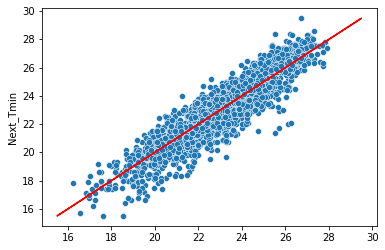

In [174]:
sns.scatterplot(x=pred,y=y_test1)
plt.plot(y_test1,y_test1,'r')

## saving the model


In [117]:
import joblib
joblib.dump(Final_model,"Final_model_Next_TMax.pkl")

['Final_model_Next_TMax.pkl']

In [175]:
import joblib
joblib.dump(Final_model1,"Final_model_Next_TMin.pkl")

['Final_model_Next_TMin.pkl']